In [1]:
# MIT License

# Titanic - Machine Learning from Disaster
O naufrágio do Titanic é um dos naufrágios mais famosos da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Neste desafio de kaggle, pedimos que você construa um modelo preditivo que responda à pergunta: "que tipo de pessoa tem mais probabilidade de sobreviver?" usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

https://www.kaggle.com/c/titanic/overview 

## Objetivos do aprendizado:
Depois de fazer este Colab, você saberá como:

* Backpropagation
* Regressão Logística
* Regressão Logística com sklearn
* Regressão Logística com Pytorch


In [2]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/pedrodiamel/dl-mini-course/blob/main/books/class_06_logistic_regression_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

## Datasets

Nesta competição, você terá acesso a dois conjuntos de dados semelhantes que incluem informações do passageiro, como nome, idade, sexo, classe socioeconômica, etc. Um conjunto de dados é intitulado `train.csv` e o outro é intitulado` test.csv` .

Baixe os dados da competição deste site: [Kaggle: Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)


## Chame as declarações de importação
O seguinte codigo importa os modulos necessários

In [ ]:
# Load the imports

# This Python 3 environment comes with many helpful analytics libraries installed

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns  # visualization tool
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
sns.set()

[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]



## Analisis e exploração dos dados do dataset titanic
*Lembrar: Precisa carregar o titanic.zip na raiz do projeto*

In [ ]:
!unzip -n titanic.zip -d titanic

for dirname, _, filenames in os.walk('./titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       
./titanic/gender_submission.csv
./titanic/test.csv
./titanic/train.csv


In [ ]:
# Passo 1
# Carrega os dados do dataset titanic empregando pandas (pd)
# link: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
### COMENZAR O CODIGO AQUI ### 
train_data = pd.read_csv("./titanic/train.csv") # ???
### TERMINA AQUI ###

# Visualize as 15 primeiras linhas da tabela train_data
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head
### COMENZAR O CODIGO AQUI ### 
num_linhas = 15 # ???
train_data.head(num_linhas)
### TERMINA AQUI ###

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Explorando os dados de teste 
# Lembrando que os dados de teste de kaggle não possuem o atributo Survival (label para o problema de classificação)
test_data = pd.read_csv("./titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Explorano os dados de submisão para kaggle
gender_submission = pd.read_csv('./titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Descripção das caracteristicas 
---



In [ ]:
# Passo 2
# Imprime informação das features presentes no conjunto de trenamento
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info 
### COMENZAR O CODIGO AQUI ### 
train_data.info() # ???
### TERMINA AQUI ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| Variable | Definition | Key 
|----------|-----------------------|-----------------------------------|
|survival  | Sobrevivência         |0=No, 1=Sim                        |
|pclass    | Classe de ingresso	   |1 = 1st, 2 = 2nd, 3 = 3rd          |
|sex       | Sexo                  | |
|Age       | Idade em anos         | |
|sibsp     | # de irmãos/cônjuges  | |
|parch     | # de pais/filhos      | |
|ticket    | Número do bilhete     | |
|fare      | Tarifa de passageiro	 | |
|cabin     | Número da cabine	     | |
|embarked  | Porto de embarcação   |C=Cherbourg, Q=Queenstown, S=Southampton |

### Dados faltantes (missing value)


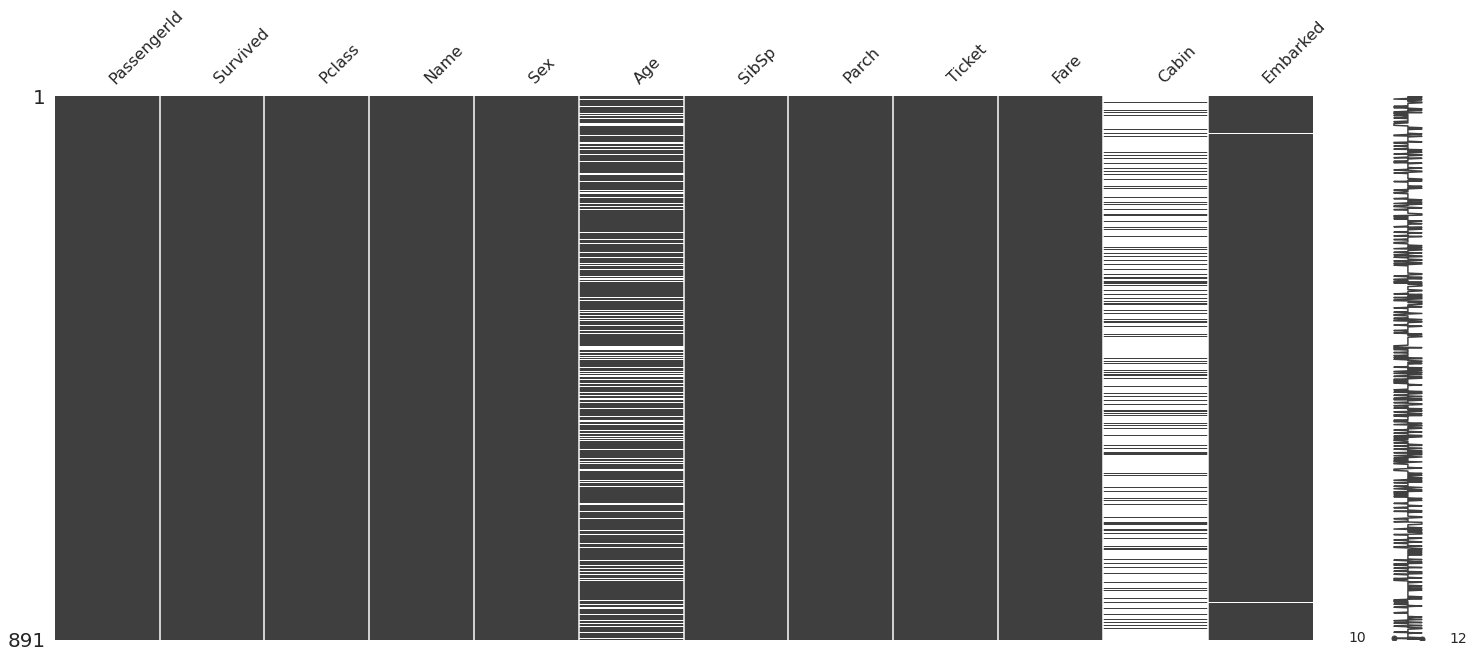

In [ ]:
# Passo 3
# Visualize os dados faltantes no conjunto de trenamento
# Para visualizar os dados faltantes ou missing value pode empregar a função matrix do pacote python missingno
# link: https://github.com/ResidentMario/missingno 
### COMENZAR O CODIGO AQUI ### 
msno.matrix(train_data) # ???
### COMENZAR O CODIGO AQUI ### 
plt.show()

### Alguns exemplos didacticos do analisis da edad e do sexo
Siéntase libre para formular novas hipóteses e validar elas no conjunto de treinamento


#### Analisis da edad
Para fazer uma análise da idade foi selecionado algumas faixas etárias para entender quais destas faixas foram mais afectadas no acidente 

Formularam-se as seguintes hipóteses: 

* Qual foi a média de idade no Titanic?
* Qual foi a faixa etária mais afetada? 
* Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate?


In [ ]:
# Passo 4
# Seleccionar a feature "Age" dos dados de treinamento
train_age = train_data['Age'].copy()
train_age = train_age[~train_data['Age'].isnull()] 

# Imprimir a estadística descriptiva da idade
print(train_age.describe())

# Qual foi a média de idade no Titanic?
### COMENZAR O CODIGO AQUI ### 
age_media = train_age.mean() # ???
### TERMINA AQUI ###
print("\nA idade media do Titanic foi de: {} anos".format(age_media))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

A idade media do Titanic foi de: 29.69911764705882 anos


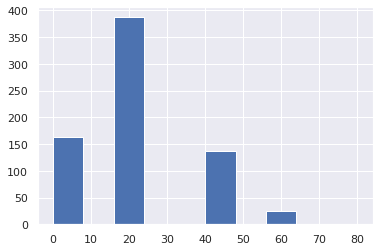

In [ ]:
# Quantification Xage
# Xage = [Xage/q] * q 
quant = 20
train_age = ((train_age/quant).astype(int)) * quant
train_age.hist()
plt.show()

In [ ]:
train_surv = train_data['Survived'].copy()
train_surv = train_surv[~train_data['Age'].isnull()]

age_surv = []
for age in train_age.sort_values(ascending=True).unique():
  age_surv.append(sum(train_surv[train_age==age]))
  print('Edad: ', age, '\t Probabilidade de sobreviver: ', sum(train_surv[train_age==age])/len(train_surv[train_age==age]) )

age_surv = pd.DataFrame( data=age_surv )[0]


Edad:  0 	 Probabilidade de sobreviver:  0.4817073170731707
Edad:  20 	 Probabilidade de sobreviver:  0.3875968992248062
Edad:  40 	 Probabilidade de sobreviver:  0.39416058394160586
Edad:  60 	 Probabilidade de sobreviver:  0.24
Edad:  80 	 Probabilidade de sobreviver:  1.0


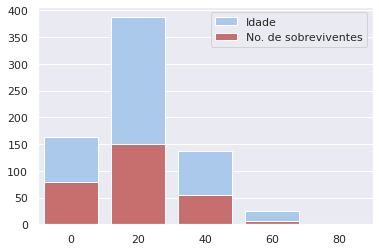

In [ ]:
age = train_age.value_counts().sort_index()
sns.set_color_codes("pastel")
g=sns.barplot(x=age.index.values, y=age.values, order=age.index, color="b", label='Idade')
sns.set_color_codes("muted")
sns.barplot(x=age.index.values, y=age_surv.values, order=age.index, color="r", label='No. de sobreviventes')
plt.legend(loc=1)
plt.show()

In [ ]:
# Passo 5
# Qual foi a faixa etária mais afetada?
# Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate?

### COMENZAR O CODIGO AQUI ### 
age_afetada = "60-80" # ???
age_meninos = "Si" # ???
### TERMINA AQUI ###
print("A faixa etária mais afetada foi: {}".format(age_afetada))
print("Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate? {}".format(age_meninos))


A faixa etária mais afetada foi: 60-80
Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate? Si


#### Analisis do sexo
Formulou-se a seguinte hipótese:
* Quem sobreviveu mais no acidente, mulheres ou homens?


In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Probabilidade de sobreviver das mulheres:", rate_women)

Probabilidade de sobreviver das mulheres: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Probabilidade de sobreviver dos homes:", rate_men)

Probabilidade de sobreviver dos homes: 0.18890814558058924


In [ ]:
# Passo 6
# Quem sobreviveu mais no acidente, mulheres ou homens?
### COMENZAR O CODIGO AQUI ### 
sex_sobreviveu = "Mulheres com uma probabilidade do 74%" # ???
### TERMINA AQUI ###

print("Quem sobreviveu mais no acidente, mulheres ou homens? {}".format(sex_sobreviveu))

Quem sobreviveu mais no acidente, mulheres ou homens? Mulheres com uma probabilidade do 74%


## Neural Networks
Neste ponto vamos implementar um framework básico para redes neurais :). Nosso objetivo é que você tenha uma visão de como os grandes frameworks de deep learning como Pwtorch e TensorFlow trabalham. Vamos a implementar algumas camadas básicas e uma iteração do backpropagation :)!!!! 

Uma rede neural pode ser vista como uma função $J(x)$. Um exemplo simple de rede neural pode ser:

$$J(x) = \frac{1}{2}(y - sigm( \Theta_2*( \Theta_1*x + b1) +b2 ) )$$

então pode ser definido:

\begin{align}
z_1 &= x \\
z_2 &= \Theta_1*z_1 + b1 \\
z_3 &= \Theta_2*z_2 + b2 \\
z_4 &= sigm( z_3 ) \\
z_5 &= \frac{1}{2}(y-z_4) \\
\end{align}

Treinar a rede significa obter parâmetros ${\theta_1, \theta_2}$ que minimizam a função objetivo $J(x)$.
A solução iterativa do gradiente descendente atualiza os pesos da siguiente forma:

$$\min_{\Theta_j} J(x)$$
    
A atualização dos pesos pode ser feita como:

$${\Theta_j}^{t+1} = {\Theta_j}^{t} + \alpha * \nabla J$$


### Camada generica
Vamos criar uma classe interface para as camas. Lembrem-se que cada camada deve ter no mínimo dois métodos forward e backward.

In [ ]:
# Example of generic Layer class 
#        + ---- -+
# z ---> | layer | ------ f(z) -->
#        +-------+ <----- (dz/dx)_i+1 ------
#        |       |
#    df(z)/dx_i  df(z)/dW_i

class layer(object):
    
    def forward(self, param):
        raise NotImplementedError

    def backward(self, param):
        raise NotImplementedError


### Camada linear
Vamos implementar uma camada para o produto interno. Para isso, apenas os métodos forward() e backward() precisam ser definidos. O método backward refere-se à derivada de camada. Como esta camada depende do vetor de entrada x e dos pesos \theta , ambos devem ser calculados em relação à derivada. O parâmetro 'dzdx' refere-se ao erro propagado.

In [ ]:
# Inner layer class
# Ecuation:
#   z = W*x + b 
#   dz/dx_i = W*(dz/dx_{i+1}) 
#   dz/dw_i = x*(dz/dx_{i+1}) 
#
class inner(layer):

    # z = W*x + b 
    def forward(self, param): 
        return np.dot(param['w'],param['x']) # param['w'] @ param['x']

    # dz/dx_i = W*(dz/dx_{i+1}) 
    # dz/dw_i = x*(dz/dx_{i+1})
    def backward(self, param):
        return np.dot(param['w'].T, param['dzdx']), np.dot(param['dzdx'],param['x'].T)

### Camada Sigm

In [ ]:
# Sigmoid layer class
# Ecuation:
#   z = sigm(x) = 1/(1+exp(-x))
#   dz/dx = sigm(x)(1-sigm(x)) *(dz/dx_i+1) 
#
class sigm(layer):
    
    def forward(self, param): 
        return self._sigm(param['x'])

    def backward(self, param):
        return self._sigm(param['x'])*(1.0-self._sigm(param['x']))*param['dzdx']

    def _sigm(self, x):
      # Passo 7
      ### COMENZAR O CODIGO AQUI ###
      sig = 1.0/(1.0 + np.exp(-x))
      ### TERMINA AQUI ### 
      return sig


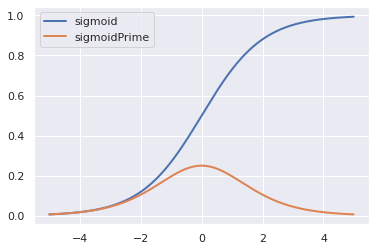

In [ ]:
x = np.arange(-5,5,0.01)
plt.plot(x, sigm().forward({'x':x}), linewidth=2)
plt.plot(x, sigm().backward({'x':x, 'dzdx':1}), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

### Camada para o MSE Loss
Agora, vamos definir a função de perda. Neste caso correspondem a MSE. Para implementação de perda personalizada, apenas a definição para frente e para trás é necessária. Um exemplo de camada de perda personalizada no caffe com python é fornecido em https://chrischoy.github.io/research/caffe-python-layer/.
$$J_{mse} = \frac{1}{n} \sum (y-h_{\theta}(x))^2$$ 

In [ ]:
# Loss layer class
# Ecuation:
#   z = 1/2 (y-x)^2
#   dz/dx = (x-y)*(dz/dx_i+1) 
#   note: dz/dx_n = 1  
#
class loss(layer):
    
    def forward(self, param):         
        return  (1.0/(2.0*len(param['y']))*np.sum((param['y']-param['x'])**2))

    def backward(self, param):
        return (param['x']-param['y'])*param['dzdx']

### Neural network

In [ ]:
# Create cost function neural netword
# Demo
#         +--------+    +--------+     +--------+              +--------+
#   ----> | inner  |--> | inner  |---> | sigm   | ---->(*)---> | loss   |
#         +--------+    +--------+     +--------+              +--------+

# Neural Network
def Net( x, w1, w2):
    '''
    forward function
    Input:
        * x vector nxm. m featurs
        * w1, w2 weigths
    Return:
        * z4
    Note: b=0
    '''
    z1 = x
    z2 = inner().forward({'x':z1, 'w':w1}) 
    z3 = inner().forward({'x':z2, 'w':w2}) 
    z4 = sigm().forward({'x':z3})
    return z4


# Cost function
def costFunc( x, y, w1, w2):
    '''
    forward function
    Input:
        * x vector nxm. m featurs
        * w1, w2 weigths
    Return:
        * z5
    
    Note: b=0
    '''

    z1 = x
    z2 = inner().forward({'x':z1, 'w':w1}) 
    z3 = inner().forward({'x':z2, 'w':w2}) 
    z4 = sigm().forward({'x':z3})
    z5 = loss().forward({'x':z4, 'y':y})

    return z5

# Gradient function
def gradCostFunc(x, y, w1, w2):
    '''
    Apply backward function
    Compute dervative with respect to w1 and w2
    '''
    
    # forward --->
    z1 = x
    z2 = inner().forward({'x':z1, 'w':w1}) 
    z3 = inner().forward({'x':z2, 'w':w2}) 
    z4 = sigm().forward({'x':z3});
    z5 = loss().forward({'x':z4, 'y':y})

    E = z5

    # <--- backward
    l5 = 1
    l4 = loss().backward({'x':z4, 'y':y, 'dzdx':l5} )  
    l3 = sigm().backward({'x':z3, 'dzdx':l4})
    l2, dEdW2 = inner().backward({'x':z2, 'w':w2, 'dzdx':l3})
    _ , dEdW1 = inner().backward({'x':z1, 'w':w1, 'dzdx':l2})

    return E, dEdW1, dEdW2

### Test

In [ ]:
# Create synthetic data

# data
x = np.matrix([[1,2,3]], dtype=np.float64).T
y = np.matrix([1.0], dtype=np.float64)

# init weights
w1 = np.matrix([[0.1, 0.2, 0.3],[0.1, 0.2, 0.3]], dtype=np.float64)
w2 = np.matrix([0.8, 0.2], dtype=np.float64)

# evaluate function
y_ = Net( x, w1, w2)
e = loss().forward({'x':y_,'y':y})

print('Loss:', e)

Loss: 0.019565606972901814


In [ ]:
# derivate
# grad J(x)
E, dEdW1, dEdW2 = gradCostFunc(x, y, w1, w2);

# minimization with gradien decent
# w^t = m*w^(t-1) + lr*gardJ  

print(E)
print(dEdW1)
print(dEdW2)

0.019565606972901814
[[-0.02511234 -0.05022469 -0.07533703]
 [-0.00627809 -0.01255617 -0.01883426]]
[[-0.0439466 -0.0439466]]


## Regressão Logística sklearn


In [ ]:
import random
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

# Passo 8
# Seleção da feature a ser estimada
# Lembrem-se que queremos saber quem sobreviveu 
### COMENZAR O CODIGO AQUI ### 
y = train_data["Survived"]
### TERMINA AQUI ###

# Passo 9
# Selecção das features
# Para este exemplo foram selecionadas 4 features. Sinta-se a bondade de 
# experimentar com um número maior ou menor. Pode determinar inclusive qual 
# seriam as melhores features para resolver o problema empregando EDA. 
### COMENZAR O CODIGO AQUI ### 
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
### TERMINA AQUI ###

# Passo 10
# Divisão do conjunto em treinamento e validação
# Seleccione o procentagem para o conjunto de validação
### COMENZAR O CODIGO AQUI ### 
tamanho_val = 0.3 # ???
### TERMINA AQUI ###
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

# Passo 11
# Criação dos modelos de regressão logistica
# Cree uma instância da classe de regression logistica
### COMENZAR O CODIGO AQUI ###
model = LogisticRegression()
### TERMINA AQUI ###

# Passo 12
# Treinamento
# Empregando a função fit treine o modelo regressão logitica
### COMENZAR O CODIGO AQUI ###
model.fit(X_train, y_train)
### TERMINA AQUI ###

# Passo 13
# Predição
### COMENZAR O CODIGO AQUI ###
preditions = model.predict(X_val)
### TERMINA AQUI ###

# Avaliação
acc = metrics.accuracy_score(y_val, preditions)

print('Accuracy', acc)

  

Accuracy 0.7947761194029851


### Escolhe o melhor parâmetro e gera um modelo

In [ ]:
# Passo 14
# Escolhe o melhor parâmetro
### COMENZAR O CODIGO AQUI ###  
model = LogisticRegression()
model.fit(X_train, y_train)
### TERMINA AQUI ###

LogisticRegression()

### Submeter teu resultado em Kaggle
Apresentar seu resultado na plataforma kaggle é muito fácil, você pode gerar um arquivo .csv e submeter no kaggle. Esperamos que você continue trabalhando para melhorar seu resultado no leaderboard e compartilhe com todos nós. Ficaremos muito feliz :D!!!

In [ ]:
# Predição no conjunto de test
predictions = model.predict(X_test)

# Submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Bora empregar um dos melhores frameworks de deep learning !!!
Implementando Regressão Logistica em PyTorch

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.10.0+cu111
False


In [ ]:
# Numpy to pytorch
# https://pytorch.org/docs/stable/generated/torch.from_numpy.html 
X_train_tensor = torch.from_numpy(X_train.to_numpy()).float()
y_train_tensor = torch.from_numpy(y_train.to_numpy()).float()
X_val_tensor   = torch.from_numpy(X_val.to_numpy()).float()
y_val_tensor   = torch.from_numpy(y_val.to_numpy()).float()
X_test_tensor  = torch.from_numpy(X_test.to_numpy()).float()

print(X_train_tensor.__class__, X_train_tensor.shape)

<class 'torch.Tensor'> torch.Size([623, 5])


In [ ]:
# Scalando a entrada 
def norm_scaling(x):
  return (x - x.min()) / (x.max() - x.min())

X_train_tensor  = norm_scaling(X_train_tensor)
X_val_tensor    = norm_scaling(X_val_tensor)
X_test_tensor   = norm_scaling(X_test_tensor)

print(X_train_tensor.min(), X_train_tensor.max())

tensor(0.) tensor(1.)


### Definição de um modelo em pytorch (modelo de neurônio)
$$ \hat{y} = h_{\theta}(x)$$

In [ ]:
model = torch.nn.Sequential(
    # Passo 15
    ### COMENZAR O CODIGO AQUI ###
    # Adiciona varias camadas
    # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
    torch.nn.Linear(5, 2), # Linear layes ->  X*\Theta
    # https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html
    torch.nn.Softmax(dim=1)
)
model

Sequential(
  (0): Linear(in_features=5, out_features=2, bias=True)
  (1): Softmax(dim=1)
)

### Função de custo tambem conhosida como Cross Entropy Loss:

\begin{split}
J(\theta) &= - \sum_{i=1}^m ( \Pi_0 \log( \frac{e^{-X_i\theta_1}}{\sum_j e^{-X_i\theta_j}}) - \Pi_1 \log( \frac{e^{-X_i\theta_2}}{\sum_j e^{-X_i\theta_j}}) )^2 \\
&= - \sum_{i=1}^m \sum_{c=0}^1  ( \Pi_c \log( \frac{e^{-X_i\theta_1}}{\sum_j e^{-X_i\theta_j}})) \\
\end{split}

In [ ]:
# Empregamos a função MSE de pytorch
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
Jbce = torch.nn.CrossEntropyLoss()

### Optimizador SGD 

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

### Trenamento do modelo

In [ ]:
iter_num = 100
J_hist = []
for t in range(iter_num):
  
  y_pred = model(X_train_tensor)
  J = Jbce(y_pred, y_train_tensor.long())
  
  J_hist.append(J.item())
  if t % 10 == 0:
    print(t, J.item())

  opt.zero_grad()
  J.backward() # calculo da derivada
  opt.step()


0 0.7281936407089233
10 0.7275469303131104
20 0.7263118028640747
30 0.7248852849006653
40 0.723406970500946
50 0.7219259738922119
60 0.7204598784446716
70 0.7190148830413818
80 0.7175934910774231
90 0.7161970138549805


[]

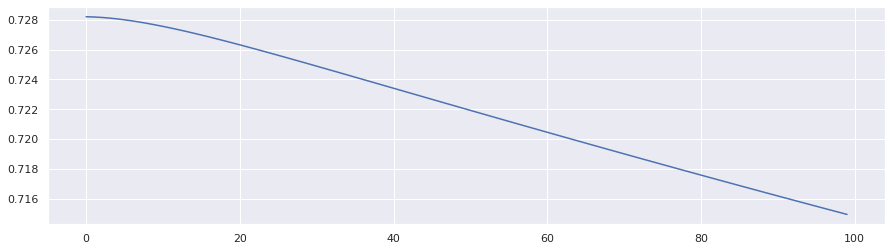

In [ ]:
# Visualização da função de custo
plt.plot(J_hist)
plt.plot()